In [1]:
import pandas as pd
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
df =pd.read_csv("dataset_file_directory.csv")
p6_dataset =df[df['Participant']== 'P06']

In [3]:
from sklearn.utils import shuffle
p6_dataset =p6_dataset[~p6_dataset['Label'].isin([ 'dysregulated','affectionate','social'])]
p6_datasets = shuffle(p6_dataset)

In [4]:
p6_datasets


,Filename,Participant,Label
3915,200607_0053_00-05-29.53--00-05-30.33.wav,P06,request
4241,200602_1650_00-04-45.83--00-04-46.64.wav,P06,delighted
4326,200527_2220_00-07-20.25--00-07-21.54c.wav,P06,delighted
4118,200603_2227_00-05-42.71--00-05-43.71c.wav,P06,yes
4363,200603_2227_00-18-22.2--00-18-22.48.wav,P06,delighted
...,...,...,...
4015,200527_2220_00-04-13.63--00-04-14.2.wav,P06,request
4156,200607_0046_00-05-29.72--00-05-30.16.wav,P06,yes
4245,200603_2227_00-09-45.3--00-09-45.75.wav,P06,delighted
4082,200527_1738_00-03-27.46--00-03-28.42.wav,P06,yes


In [5]:
#feature extraction function for dataset

#************note skipping record that don't have correspondent audio file ******************


# Specify the directory where your Python script is located
script_dir = r"C:\Users\pawan\Desktop\mv\downloaddataset"
# Define the relative path to the WAV files directory
wav_dir = os.path.join(script_dir, "downloaded_wav_files")
def extract_audiofeatures(dataset, features_list, labels_list):
    null_file = 0
    for index, row in dataset.iterrows():
        filename = row['Filename']
        participant = row['Participant']
        label = row['Label']
        wav_file_path = os.path.join(wav_dir, filename)

        # Check if the audio file exists before attempting to load it
        if os.path.exists(wav_file_path):
            try:
                # Load the WAV file using librosa
                audio_data, sample_rate = librosa.load(wav_file_path, sr=None)  # sr=None to preserve the original sample rate

                # Extract MFCCs
                mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=20)
                mfccs_mean = np.mean(mfccs, axis=1)

                # Extract Chroma features
                chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
                chroma_mean = np.mean(chroma, axis=1)

                # Extract Spectral Contrast features
                spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
                spectral_contrast_mean = np.mean(spectral_contrast, axis=1)

                # Extract Fundamental Frequency (F0) using librosa
                f0, voiced_flag, voiced_probs = librosa.pyin(audio_data, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
                f0_mean = np.mean(f0)

                # Combine all features
                combined_feature_vector = np.hstack((mfccs_mean, chroma_mean, spectral_contrast_mean, f0_mean))

                # Append the extracted features and label to the lists
                features_list.append(combined_feature_vector)
                labels_list.append(label)

            except Exception as e:
                print(f"Error processing {wav_file_path}: {str(e)}")
        else:
            null_file += 1
            print(f"Audio file not found: {wav_file_path}")
    print("Related audio file unfound count:", null_file)

# Now, features1 and labels1 should only contain data for audio files that exist


In [6]:
def extract_audiofeatures1(dataset, features_list, labels_list):
    null_file = 0
    for index, row in dataset.iterrows():
        filename = row['Filename']
        participant = row['Participant']
        label = row['Label']
        wav_file_path = os.path.join(wav_dir, filename)

        # Check if the audio file exists before attempting to load it
        if os.path.exists(wav_file_path):
            try:
                # Load the WAV file using librosa
                audio_data, sample_rate = librosa.load(wav_file_path, sr=None)  # sr=None to preserve the original sample rate

                # Extract MFCCs
#                 mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=20)
#                 mfccs_mean = np.mean(mfccs, axis=1)
#                 chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
#                 chroma_mean = np.mean(chroma, axis=1)
                spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
                spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
                # Extract Fundamental Frequency (F0) using librosa
                f0, voiced_flag, voiced_probs = librosa.pyin(audio_data, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
                f0_mean = np.mean(f0)

                # Combine MFCCs and F0 as features
                combined_feature_vector = np.hstack(( f0_mean,spectral_contrast_mean))

                # Append the extracted features and label to the lists
                features_list.append(combined_feature_vector)
                labels_list.append(label)

            except Exception as e:
                print(f"Error processing {wav_file_path}: {str(e)}")
        else:
            null_file += 1
            print(f"Audio file not found: {wav_file_path}")
    print("Related audio file unfound count:", null_file)


In [7]:
features6 = []
labels6 = []

extract_audiofeatures1(p6_datasets,features6,labels6)

P06_X=np.array(features6)
P06_y=np.array(labels6)


Related audio file unfound count: 0


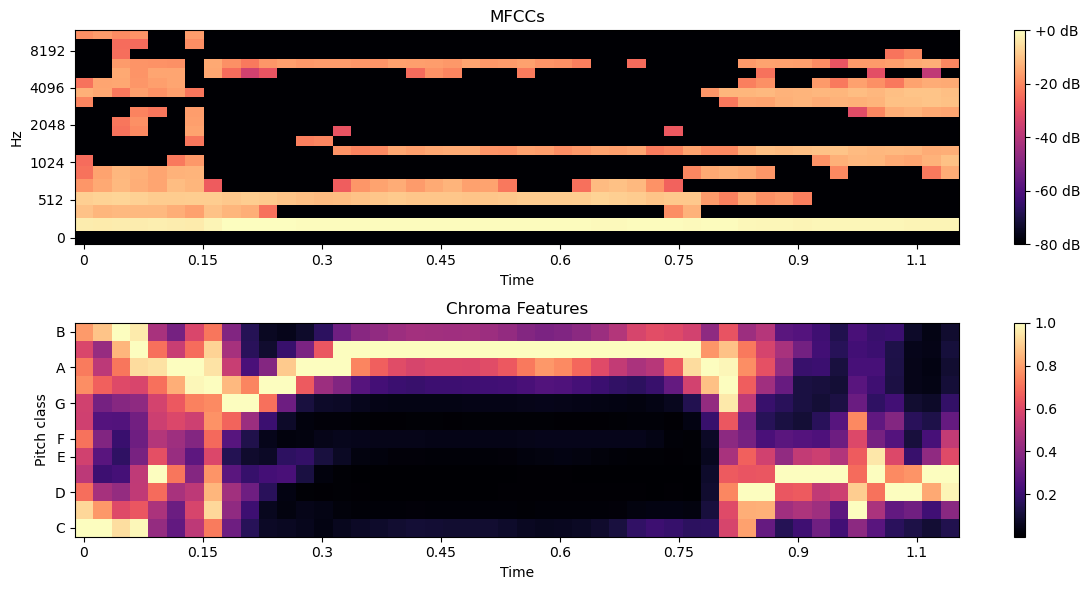

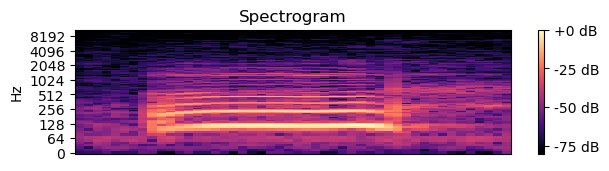

In [32]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Assuming you have already defined your extract_audiofeatures function
# ...

# Plot an audio waveform for a specific file
def plot_audio_waveform():
    wav_file_path = r"C:\Users\pawan\Desktop\mv\downloaddataset\downloaded_wav_files\191224_0710_00-04-05.85--00-04-06.39.wav"

    # Check if the audio file exists before attempting to load it
    if os.path.exists(wav_file_path):
        try:
            # Load the WAV file using librosa
            audio_data, sample_rate = librosa.load(wav_file_path, sr=None)  # sr=None to preserve the original sample rate

            mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=20)

            # Extract Chroma features
            chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)

            # Plot MFCCs
            plt.figure(figsize=(12, 6))
            plt.subplot(2, 1, 1)
            librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='mel', x_axis='time')
            plt.colorbar(format='%+2.0f dB')
            plt.title('MFCCs')

            # Plot Chroma features
            plt.subplot(2, 1, 2)
            librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
            plt.colorbar()
            plt.title('Chroma Features')

            plt.tight_layout()
            plt.show()

            plt.subplot(3, 1, 3)
            librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max), y_axis='log')
            plt.colorbar(format='%+2.0f dB')
            plt.title('Spectrogram')

            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error processing {wav_file_path}: {str(e)}")
    else:
        print(f"Audio file not found: {wav_file_path}")


plot_audio_waveform()



In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
label_encoder=LabelEncoder()
P06y_encoded = label_encoder.fit_transform(P06_y)
X_train_P06, X_test_P06, y_train_P06,y_test_P06 = train_test_split(P06_X, P06y_encoded,test_size=0.25, random_state=42)

In [12]:
X_train_P06.shape

(420, 8)

In [13]:
#check class

def check_class(y_train,y_test):
    unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
    unique_classes_test, counts_test = np.unique(y_test, return_counts=True)

    # Compare the unique classes in both sets
    if np.array_equal(unique_classes_train, unique_classes_test):
        print("All classes are present in both the training and test sets.")
    else:
        print("Classes are not consistent between training and test sets.")

check_class(y_train_P06,y_test_P06)


All classes are present in both the training and test sets.


In [15]:
import pandas as pd
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load your dataset and preprocess it as you did before

# Define the model
model = models.Sequential([
    layers.Reshape((X_train_P06.shape[1], 1), input_shape=(X_train_P06.shape[1],)),
    
    # Add more convolutional layers
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(256, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    
    layers.Flatten(),
    
    # Add more dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(5, activation='softmax')  # Adjust the output units based on your number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_P06 = model.fit(X_train_P06, y_train_P06, epochs=75, 
                        validation_split=0.2, 
                        batch_size=42)

# Evaluate the model on the test set
test_loss_P06, test_accuracy_P06 = model.evaluate(X_test_P06, y_test_P06)
print(f"Test accuracy for model_P06: {test_accuracy_P06 * 100:.2f}%")


Epoch 1/75
8/8 [==============================] - 1s 69ms/step - loss: 1.6080 - accuracy: 0.4048 - val_loss: 1.6060 - val_accuracy: 0.4286
Epoch 2/75
8/8 [==============================] - 0s 18ms/step - loss: 1.6044 - accuracy: 0.4048 - val_loss: 1.6023 - val_accuracy: 0.4286
Epoch 3/75
8/8 [==============================] - 0s 15ms/step - loss: 1.6008 - accuracy: 0.4048 - val_loss: 1.5989 - val_accuracy: 0.4286
Epoch 4/75
8/8 [==============================] - 0s 15ms/step - loss: 1.5975 - accuracy: 0.4048 - val_loss: 1.5953 - val_accuracy: 0.4286
Epoch 5/75
8/8 [==============================] - 0s 17ms/step - loss: 1.5940 - accuracy: 0.4048 - val_loss: 1.5919 - val_accuracy: 0.4286
Epoch 6/75
8/8 [==============================] - 0s 15ms/step - loss: 1.5908 - accuracy: 0.4048 - val_loss: 1.5883 - val_accuracy: 0.4286
Epoch 7/75
8/8 [==============================] - 0s 15ms/step - loss: 1.5875 - accuracy: 0.4048 - val_loss: 1.5851 - val_accuracy: 0.4286
Epoch 8/75
8/8 [===========

In [16]:
test_loss_P06, test_accuracy_P06 = model.evaluate(X_test_P06, y_test_P06)
print(f"Test accuracy for model_P06: {test_accuracy_P06 * 100:.2f}%")

5/5 [==============================] - 0s 3ms/step - loss: 1.4724 - accuracy: 0.3929
Test accuracy for model_P06: 39.29%
